In [1]:
import networkx as nx
import numpy as np
from grandiso import find_motifs
import matplotlib.pyplot as plt
import scipy.special
import time
import json
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams.update({'font.size': 12})

# Sampling and kernel

In [2]:
def nb_samples_required(a, delta, epsilon):
    return int(np.ceil(2 * (np.log(2) * a + np.log(1 / delta)) / (epsilon**2)))

In [3]:
# Create all graphlets of size 3, 4, 5
def build_graphlets(k):
    if k == 3:
        graphlets = [
            np.zeros((3, 3)),
            np.array([[0, 1, 0], [1, 0, 0], [0, 0, 0]]),
            np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]]),
            np.array([[0, 1, 0], [0, 0, 1], [1, 0, 0]])
        ]
    if k == 4:
        graphlets = [
            np.zeros((4,4)),
            np.array([[0, 1, 0, 0],[1, 0, 0, 0],[0, 0, 0, 0],[0, 0, 0, 0]]),
            np.array([[0, 1, 0, 0],[1, 0, 0, 0],[0, 0, 0, 1],[0, 0, 1, 0]]),
            np.array([[0, 1, 1, 0],[1, 0, 0, 0],[1, 0, 0, 0],[0, 0, 0, 0]]),
            np.array([[0, 1, 1, 0],[1, 0, 1, 0],[1, 1, 0, 0],[0, 0, 0, 0]]),
            np.array([[0, 1, 1, 0],[1, 0, 0, 1],[1, 0, 0, 0],[0, 1, 0, 0]]),
            np.array([[0, 1, 1, 0],[1, 0, 0, 1],[1, 0, 1, 0],[0, 1, 1, 0]]),
            np.array([[0, 1, 1, 1],[1, 0, 0, 0],[1, 0, 0, 0],[1, 0, 0, 0]]),
            np.array([[0, 1, 1, 1],[1, 0, 1, 0],[1, 1, 0, 0],[1, 0, 0, 0]]),
            np.array([[0, 1, 1, 1],[1, 0, 1, 1],[1, 1, 0, 0],[1, 1, 0, 0]]),
            np.array([[0, 1, 1, 1],[1, 0, 1, 1],[1, 1, 0, 1],[1, 1, 1, 0]])
        ]
        
        
        #np.array([[0, 0, 0, 0, 0],[0, 0, 0, 0, 0],[0, 0, 0, 0, 0],[0, 0, 0, 0, 0],[0, 0, 0, 0, 0]]),
        
    if k == 5:
        graphlets = [
            np.zeros((5,5)),
            np.array([[0, 1, 0, 0, 0],[1, 0, 0, 0, 0],[0, 0, 0, 0, 0],[0, 0, 0, 0, 0],[0, 0, 0, 0, 0]]), #2
            np.array([[0, 1, 0, 0, 0],[1, 0, 1, 0, 0],[0, 1, 0, 0, 0],[0, 0, 0, 0, 0],[0, 0, 0, 0, 0]]), #3
            np.array([[0, 1, 0, 0, 0],[1, 0, 0, 0, 0],[0, 0, 0, 1, 0],[0, 0, 1, 0, 0],[0, 0, 0, 0, 0]]), #4
            np.array([[0, 1, 1, 1, 0],[1, 0, 0, 0, 0],[1, 0, 0, 0, 0],[1, 0, 0, 0, 0],[0, 0, 0, 0, 0]]), #5
            np.array([[0, 1, 1, 0, 0],[1, 0, 1, 0, 0],[1, 1, 0, 0, 0],[0, 0, 0, 0, 0],[0, 0, 0, 0, 0]]), #6
            np.array([[0, 1, 0, 0, 0],[1, 0, 1, 0, 0],[0, 1, 0, 1, 0],[0, 0, 1, 0, 0],[0, 0, 0, 0, 0]]), #7
            np.array([[0, 1, 0, 0, 0],[1, 0, 1, 0, 0],[0, 1, 0, 0, 0],[0, 0, 0, 0, 1],[0, 0, 0, 1, 0]]), #8
            np.array([[0, 1, 1, 1, 1],[1, 0, 0, 0, 0],[1, 0, 0, 0, 0],[1, 0, 0, 0, 0],[1, 0, 0, 0, 0]]), #9
            np.array([[0, 1, 1, 1, 0],[1, 0, 1, 0, 0],[1, 1, 0, 0, 0],[1, 0, 0, 0, 0],[0, 0, 0, 0, 0]]), #10
            np.array([[0, 1, 0, 0, 0],[1, 0, 1, 0, 0],[0, 1, 0, 1, 1],[0, 0, 1, 0, 0],[0, 0, 1, 0, 0]]), #11
            np.array([[0, 1, 1, 0, 0],[1, 0, 1, 0, 0],[1, 1, 0, 0, 0],[0, 0, 0, 0, 1],[0, 0, 0, 1, 0]]), #12 
            np.array([[0, 1, 0, 1, 0],[1, 0, 1, 0, 0],[0, 1, 0, 1, 0],[1, 0, 1, 0, 0],[0, 0, 0, 0, 0]]), #13
            np.array([[0, 1, 0, 0, 0],[1, 0, 1, 0, 0],[0, 1, 0, 1, 0],[0, 0, 1, 0, 1],[0, 0, 0, 1, 0]]), #14
            np.array([[0, 1, 1, 1, 1],[1, 0, 1, 0, 0],[1, 1, 0, 0, 0],[1, 0, 0, 0, 0],[1, 0, 0, 0, 0]]), #15
            np.array([[0, 1, 1, 0, 1],[1, 0, 1, 0, 0],[1, 1, 0, 1, 0],[1, 0, 1, 0, 0],[0, 0, 0, 0, 0]]), #16
            np.array([[0, 1, 1, 1, 0],[1, 0, 1, 0, 1],[1, 1, 0, 0, 0],[1, 0, 0, 0, 0],[0, 1, 0, 0, 0]]), #17
            np.array([[0, 1, 1, 1, 0],[1, 0, 1, 0, 0],[1, 1, 0, 0, 0],[1, 0, 0, 0, 1],[0, 0, 0, 1, 0]]), #18
            np.array([[0, 1, 0, 1, 1],[1, 0, 1, 0, 0],[0, 1, 0, 1, 0],[1, 0, 1, 0, 0],[1, 0, 0, 0, 0]]), #19
            np.array([[0, 1, 0, 0, 1],[1, 0, 1, 0, 0],[0, 1, 0, 1, 0],[0, 0, 1, 0, 1],[1, 0, 0, 1, 0]]), #20
            np.array([[0, 1, 1, 1, 1],[1, 0, 1, 0, 0],[1, 1, 0, 1, 0],[1, 0, 1, 0, 0],[1, 0, 0, 0, 0]]), #21
            np.array([[0, 1, 1, 1, 1],[1, 0, 1, 0, 0],[1, 1, 0, 0, 0],[1, 0, 0, 0, 1],[1, 0, 0, 1, 0]]), #22
            np.array([[0, 1, 3, 1, 0],[1, 0, 1, 1, 0],[1, 1, 0, 1, 0],[1, 1, 1, 0, 0],[0, 0, 0, 0, 0]]), #23
            np.array([[0, 1, 0, 1, 1],[1, 0, 1, 1, 0],[0, 1, 0, 1, 0],[1, 1, 1, 0, 0],[1, 0, 0, 0, 0]]), #24
            np.array([[0, 1, 0, 1, 1],[1, 0, 1, 0, 1],[0, 1, 0, 1, 0],[1, 0, 1, 0, 0],[1, 1, 0, 0, 0]]), #25
            np.array([[0, 1, 0, 1, 1],[1, 0, 1, 0, 0],[0, 1, 0, 1, 1],[1, 0, 1, 0, 0],[1, 0, 1, 0, 0]]), #26
            np.array([[0, 1, 1, 1, 1],[1, 0, 1, 0, 0],[1, 1, 0, 1, 1],[1, 0, 1, 0, 0],[1, 0, 1, 0, 0]]), #27
            np.array([[0, 1, 3, 1, 0],[1, 0, 1, 1, 1],[1, 1, 0, 1, 0],[1, 1, 1, 0, 0],[0, 1, 0, 0, 0]]), #28
            np.array([[0, 1, 1, 1, 1],[1, 0, 1, 1, 0],[1, 1, 0, 0, 0],[1, 1, 0, 0, 1],[1, 0, 0, 1, 0]]), #29
            np.array([[0, 1, 1, 0, 1],[1, 0, 1, 1, 0],[1, 1, 0, 1, 0],[1, 0, 1, 0, 1],[1, 0, 0, 1, 0]]), #30
            np.array([[0, 1, 1, 1, 1],[1, 0, 1, 0, 0],[1, 1, 0, 1, 1],[1, 0, 1, 0, 1],[1, 0, 1, 1, 0]]), #31
            np.array([[0, 1, 0, 1, 1],[1, 0, 1, 0, 1],[0, 1, 0, 1, 1],[1, 0, 1, 0, 1],[1, 1, 1, 1, 0]]), #32
            np.array([[0, 1, 1, 1, 1],[1, 0, 1, 1, 0],[1, 1, 0, 1, 1],[1, 1, 1, 0, 1],[1, 0, 1, 1, 0]]), #33
            np.array([[0, 1, 1, 1, 1],[1, 0, 1, 1, 1],[1, 1, 0, 1, 1],[1, 1, 1, 0, 1],[1, 1, 1, 1, 0]]), #33
        ]
    
    return [nx.from_numpy_matrix(m) for m in graphlets]

In [4]:
def sample_subgraphs(G, k):
    nodes = G.nodes()

    return G.subgraph(np.random.choice(nodes, k, replace=False).tolist())

In [5]:
def find_iso_graphlet(subgraph, graphlets, spectrum):
    for i, graphlet in enumerate(graphlets):
        if nx.is_isomorphic(subgraph, graphlet):
            spectrum[i] += 1

In [6]:
def estimate_spectrum(G, k, delta, epsilon):
    graphlets = build_graphlets(k)
    m = nb_samples_required(len(graphlets), delta, epsilon)
    spectrum = np.zeros(len(graphlets))

    for _ in range(m):
        subgraph = sample_subgraphs(G, k)
        find_iso_graphlet(subgraph, graphlets, spectrum)

    #return spectrum / np.linalg.norm(spectrum) # to sum to 1 for kernel(G, G)
    return spectrum / m

In [7]:
def kernel(G1, G2, k, delta, epsilon):
    spectrum1 = estimate_spectrum(G1, k, delta, epsilon)
    spectrum2 = estimate_spectrum(G2, k, delta, epsilon)

    return spectrum1.T @ spectrum2

# Figures
### Evolution of $N_k$ vs $2^{binom(k, 2)}$

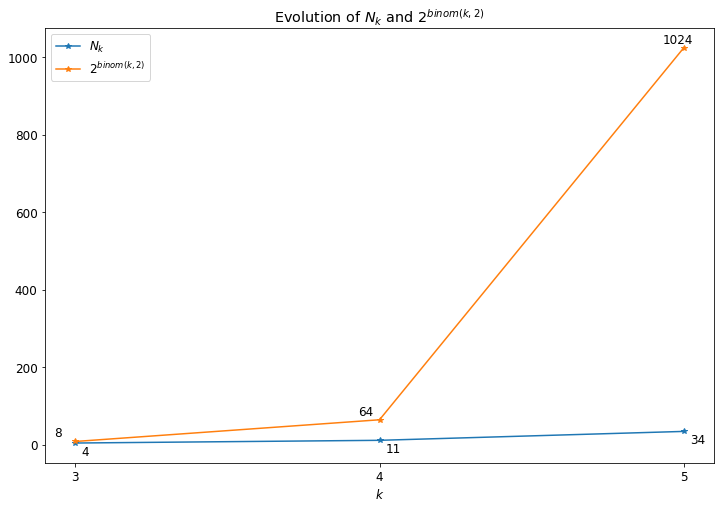

In [61]:
plt.plot([3, 4, 5], [4, 11, 34], label='$N_k$', marker='*')
plt.plot([3, 4, 5], [2**scipy.special.binom(k, 2) for k in [3, 4, 5]], label='$2^{binom(k, 2)}$', marker='*')
for i,j in zip([3,4,5], [4, 11, 34]):
    plt.annotate(str(j),xy=(i+0.02,j-30))
for i,j in zip([3,4,5], [int(2**scipy.special.binom(k, 2)) for k in [3, 4, 5]]):
    plt.annotate(str(j),xy=(i-0.07,j+13))
plt.legend()
plt.title('Evolution of $N_k$ and $2^{binom(k, 2)}$')
plt.xticks([3, 4, 5])
plt.xlabel('$k$')
plt.savefig('plots/Nk_2_binom.png')
plt.show()

### Evolution of $binom(n, k)$ vs m

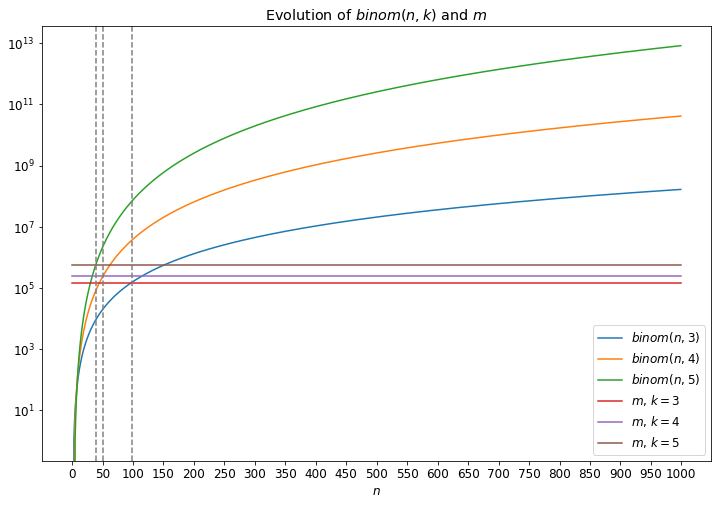

In [71]:
epsilon = 0.01
delta = 0.01
ns = list(range(1000))

n3 = [scipy.special.binom(n, 3) for n in ns]
n4 = [scipy.special.binom(n, 4) for n in ns]
n5 = [scipy.special.binom(n, 5) for n in ns]

m3 = nb_samples_required(4, delta, epsilon)
m4 = nb_samples_required(11, delta, epsilon)
m5 = nb_samples_required(34, delta, epsilon)

plt.semilogy(ns, n3, label='$binom(n, 3)$')
plt.semilogy(ns, n4, label='$binom(n, 4)$')
plt.semilogy(ns, n5, label='$binom(n, 5)$')

plt.semilogy(ns, [m3] * len(ns), label='$m$, $k=3$')
plt.semilogy(ns, [m4] * len(ns), label='$m$, $k=4$')
plt.semilogy(ns, [m5] * len(ns), label='$m$, $k=5$')

tmp = [np.argwhere(m3 < np.array(n3))[0], np.argwhere(m4 < np.array(n4))[0], np.argwhere(m5 < np.array(n5))[0]]
plt.axvline(tmp[0], linestyle='--', color='grey')
plt.axvline(tmp[1], linestyle='--', color='grey')
plt.axvline(tmp[2], linestyle='--', color='grey')

plt.legend()
plt.xlabel('$n$')
plt.title('Evolution of $binom(n, k)$ and $m$')
plt.xticks(list(range(0, 1001, 50)))
plt.savefig('plots/bin_m.png')
plt.show()

# Experiments

In [61]:
G = nx.fast_gnp_random_graph(100, 0.1)

spectrum = estimate_spectrum(G, 5, 0.05, 0.05)

In [62]:
sum(spectrum)

0.9999529433908992

In [10]:
kernel(G, G, 3, 0.05, 0.05)

0.5902935573269605

In [36]:
graphlet = nx.from_numpy_matrix(np.array([[0, 1, 0], [0, 0, 1], [1, 0, 0]]))
motif1 = nx.Graph()
motif1.add_node("A")
motif1.add_node("C")
motif1.add_edge("A","C")
motif2 = nx.Graph()
motif2.add_edge("A", "B")
motif2.add_edge("B", "C")
motif2.add_edge("C", "A")

find_motifs(motif1,G,count_only=True,isomorphisms_only=True),find_motifs(motif2,G,count_only=True,isomorphisms_only=True)



(956, 924)

### Scalability with $n$

In [8]:
ns = [10**i for i in range(2, 10)]
times = {k: {} for k in [3, 4, 5]}

for n in ns:
    # To have connected graphs
    G1 = nx.fast_gnp_random_graph(n, p=1.1 * np.log(n)/n)
    G2 = nx.fast_gnp_random_graph(n, p=1.1 * np.log(n)/n)
    for k in [3, 4, 5]:

        start = time.process_time_ns()
        kernel(G1, G2, k, 0.05, 0.05)
        stop = time.process_time_ns()

        times[k][n] = (stop - start) / 1e9
        print(f'Time (k={k}, n={n}) : {(stop - start) / 1e9:.4f}')

with open('times_kernel.json', 'w') as fp:
    json.dump(times, fp)

Time (k=3, n=100) : 4.0336
Time (k=4, n=100) : 14.0414
Time (k=5, n=100) : 83.4315
Time (k=3, n=1000) : 5.1391
Time (k=4, n=1000) : 16.5220
Time (k=5, n=1000) : 89.2364
Time (k=3, n=10000) : 12.0175
Time (k=4, n=10000) : 28.4276
Time (k=5, n=10000) : 120.4740
Time (k=3, n=100000) : 79.7167
Time (k=4, n=100000) : 153.2338


KeyboardInterrupt: 

### Comparison of spectrum with NetworkX